<a href="https://colab.research.google.com/github/RajkumarGalaxy/StructuredData/blob/master/MLE_Maximum_Likelihood_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maximum Likelihood Estimation

In [ ]:
# import the necessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels import api
from scipy import stats
from scipy.optimize import minimize

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# create an independent variable 
x = np.linspace(-10, 30, 100)

# create a normally distributed residual
e = np.random.normal(10, 5, 100)

# generate ground truth
y = 10 + 4*x + e

df = pd.DataFrame({'x':x, 'y':y})
df.head()

,x,y
0,-10.000000,-17.220807
1,-9.595960,-17.773363
2,-9.191919,-23.880360
3,-8.787879,-15.207193
4,-8.383838,-12.147515


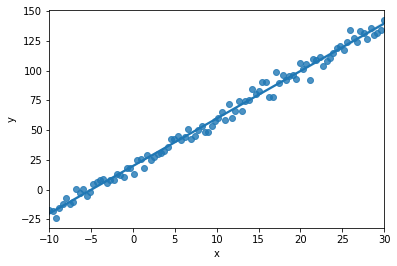

In [ ]:
# visualize data distribution
sns.regplot(x='x', y='y', data = df)
plt.show()

## Solve by OLS approach

In [ ]:
features = api.add_constant(df.x)
model = api.OLS(y, features).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.118e+04
Date:                Fri, 16 Apr 2021   Prob (F-statistic):          8.44e-103
Time:                        12:02:58   Log-Likelihood:                -289.15
No. Observations:                 100   AIC:                             582.3
Df Residuals:                      98   BIC:                             587.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.8108      0.580     34.144      0.000      18.659      20.962
x              3.9924      0.038    105.714      0.000       3.917       4.067
==============================================================================
Omnibus:                        0.031   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.985   Jarque-Bera (JB):                0.056
Skew:                           0.033   Prob(JB):                        0.972
Kurtosis:                       2.904   Cond. No.                         20.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# find the std dev
res = model.resid
standard_dev = np.std(res)
standard_dev

4.360467019992252

## Solve by MLE approach

In [ ]:
# MLE

def MLE_Norm(parameters):
  const, beta, std_dev = parameters
  pred = const + beta*x

  LL = np.sum(stats.norm.logpdf(y, pred, std_dev))
  neg_LL = -1*LL
  return neg_LL

In [ ]:
mle_model = minimize(MLE_Norm, np.array([2,2,2]), method='L-BFGS-B')
mle_model

      fun: 289.1517699511119
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-5.11590770e-05, -1.06865627e-03,  1.13686838e-05])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 232
      nit: 35
   status: 0
  success: True
        x: array([19.81075117,  3.99244393,  4.36046757])

### We can find that the parameters obtained through MLE is matching with that of the OLS approach.

### Thank you for your time!